<a href="https://colab.research.google.com/github/ricardojperez/DataAnalysis/blob/main/PrediccionVentas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importan las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns

Los datos se generaron con la ayuda de chatGPT con el siguiente prompt: "Estoy creando un modelo de machine learning para predecir las ventas de una campaña de publicidad en función de cuanto se le invirtió a esa campaña  en la TV, radio y periódico. Crea una tabla de datos ficticios con 50 filas y con 4 columnas(TV, Radio,Periódico,Sales) .Genera cada columna en una salida independiente"


In [5]:
df = pd.read_csv('PrediccionVentas.csv',index_col=0)

Visualizacion de la tabla


In [6]:
df

,TV,Radio,Periodico,Ventas
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


Se calculan los datos estadísticos de la variable a predecir

In [10]:
df["Ventas"].describe()

count    51.000000
mean     13.676471
std       4.739856
min       4.800000
25%      10.250000
50%      12.500000
75%      17.000000
max      25.400000
Name: Ventas, dtype: float64

Se muestra la distribucion de datos de la variable Ventas


<ipython-input-7-f2d4a640c354>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ventas'])


<Axes: xlabel='Ventas', ylabel='Density'>

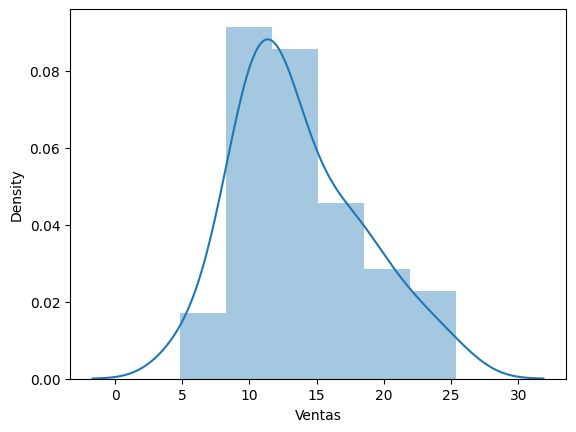

In [7]:
sns.distplot(df['Ventas'])

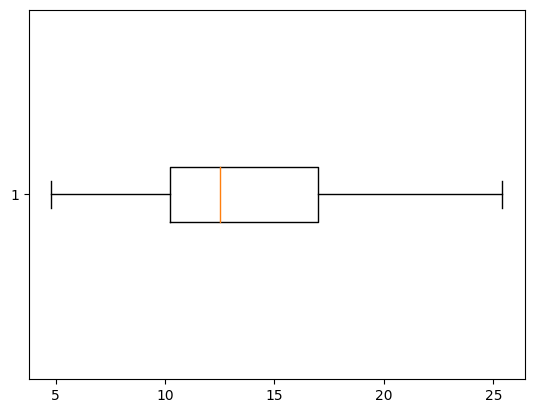

In [9]:
plt.boxplot(df['Ventas'],vert=False)
plt.show()

In [12]:
data = pd.concat([df['TV'],df['Ventas']],axis=1)

Grafica de dispersion de Ventas con presupuesto en TV

<Axes: xlabel='TV', ylabel='Ventas'>

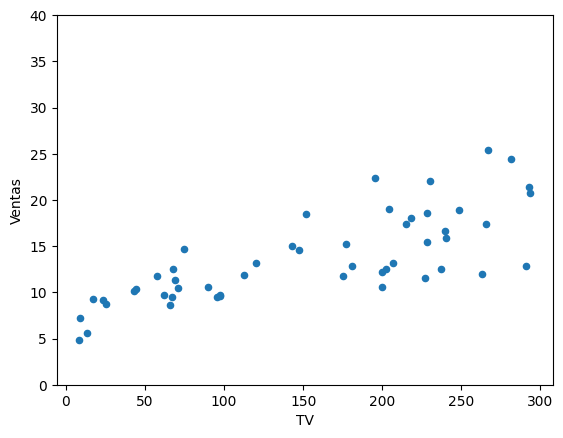

In [17]:
data.plot.scatter(x='TV',y='Ventas',ylim=(0,40))

In [18]:
data = pd.concat([df['Radio'],df['Ventas']],axis=1)

Grafica de dispersion de Ventas con presupuesto en Radio

<Axes: xlabel='Radio', ylabel='Ventas'>

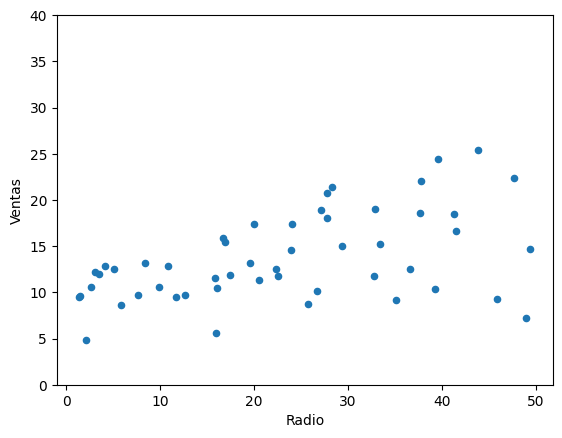

In [19]:
data.plot.scatter(x='Radio',y='Ventas',ylim=(0,40))

Grafica de dispersion de Ventas con presupuesto en periodico

In [20]:
data = pd.concat([df['Periodico'],df['Ventas']],axis=1)

<Axes: xlabel='Periodico', ylabel='Ventas'>

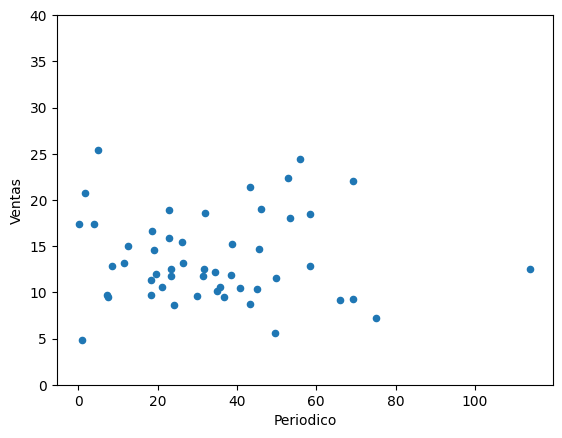

In [21]:
data.plot.scatter(x='Periodico',y='Ventas',ylim=(0,40))

Se calcula la correlacion

In [22]:
corrmat = df.corr()

In [23]:

corrmat

,TV,Radio,Periodico,Ventas
TV,1.000000,-0.021794,-0.278024,0.763346
Radio,-0.021794,1.000000,0.477861,0.490877
Periodico,-0.278024,0.477861,1.000000,-0.018584
Ventas,0.763346,0.490877,-0.018584,1.000000


<Axes: >

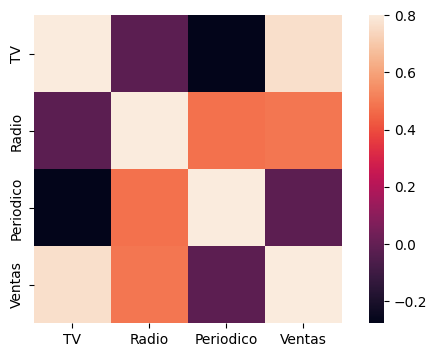

In [27]:
f, ax = plt.subplots(figsize=(7,4))
sns.heatmap(corrmat, vmax=.8, square= True)

In [30]:
k=3

cols = corrmat.nlargest(k,"Ventas")["Ventas"].index


Se muestran las variables con mas relacion con Ventas


In [31]:

cols

Index(['Ventas', 'TV', 'Radio'], dtype='object')

Se genera la matriz de correlaciones

In [33]:
cm = np.corrcoef(df[cols].values.T)

In [34]:
sns.set(font_scale=1.25)

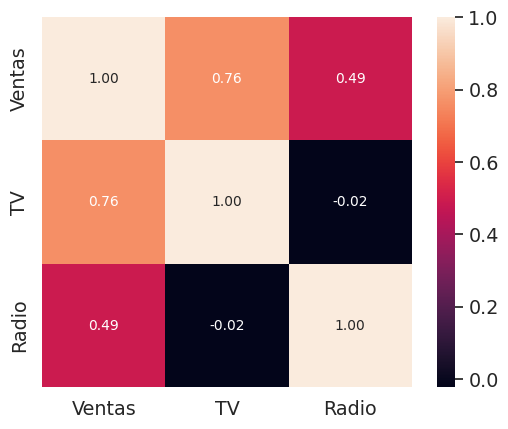

In [35]:
hm=sns.heatmap(cm,cbar=True, annot=True, square=True , fmt =".2f", annot_kws={"size":10,},yticklabels=cols.values , xticklabels=cols.values)
plt.show()

Con los datos obtenidos , se hara una prediccion de las ventas en funcion de el presupuesto invertido en la TV y la Radio

In [36]:

from sklearn.linear_model import LinearRegression

In [38]:

lin_reg = LinearRegression()


In [41]:
X= df.drop(columns=['Ventas','Periodico'])

In [44]:
y=df['Ventas']

Se realiza la division de los datos de entrenamiento y test

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

Se entrena el modelo

In [46]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [47]:
lin_reg.coef_

array([0.04032219, 0.18205689])

In [48]:
lin_reg.intercept_

3.3062646481545155

In [49]:
y_pred_train = lin_reg.predict(X_train)

Se hace una grafica de dispersion de las Ventas reales con las predecidas por el modelo

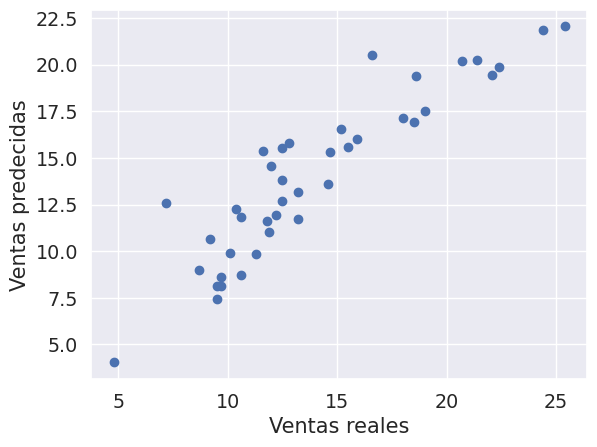

In [51]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predecidas")
plt.show()

In [52]:
from sklearn.metrics import r2_score

Se calcula el coeficiente de determinacion, que mide la capacidad de un modelo de predecir futuros resultados

In [53]:
r2_score(y_train,y_pred_train)

0.8343346064131849

Se vuelven a predecir valores péro ahora con los datos de test

In [54]:
y_pred_test = lin_reg.predict(X_test)

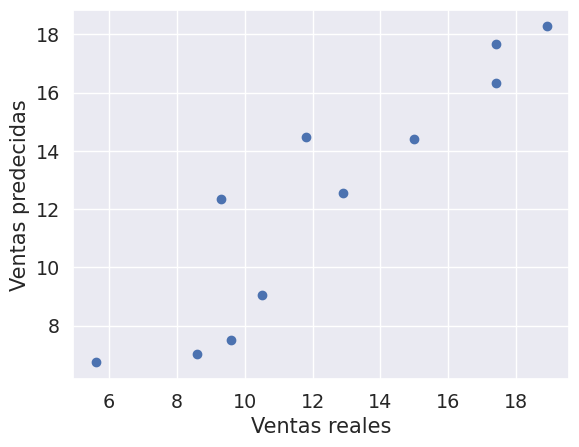

In [55]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predecidas")
plt.show()

In [56]:
r2_score(y_test,y_pred_test)

0.841552963940786

Ejemplo nuevo

In [58]:
dt = [[43.2,30]]

In [59]:
y_pred = lin_reg.predict(dt)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
print(y_pred)

[10.50988972]
